# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Loading the dataset
import pandas as pd
df = pd.read_csv('/content/imdb_movie_reviews_cleaned.csv')
cleaned_reviews = df['Cleaned Review'].tolist()[:100] # Choosing 100 reviews for the assignment

In [ ]:
import re
from collections import Counter
import pandas as pd
import spacy

# Loading spaCy language model
nlp = spacy.load('en_core_web_sm')

# Preprocessing text: convert to lowercase, remove punctuation, and split into words
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuation
    words = text.split()  # Splitting into words
    return words

# Extracting N-grams (trigrams and bigrams)
def extract_ngrams(words, n=3):
    ngrams = [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]
    return ngrams

# Calculating bigram probabilities using the formula: count(w2 w1) / count(w1)
def calculate_bigram_probabilities(corpus, bigram_counts):
    unigram_counts = Counter()

    # Counting unigrams in the corpus
    for text in corpus:
        words = preprocess(text)
        unigram_counts.update(words)

    # Calculating bigram probabilities
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        w1 = bigram[0]
        if unigram_counts[w1] > 0:
            probability = count / unigram_counts[w1]
        else:
            probability = 0
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Extracting noun phrases using spaCy's dependency parsing
def extract_noun_phrases(text):
    doc = nlp(text)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]
    return noun_phrases

# Calculating relative probabilities of noun phrases for each review
def calculate_relative_probabilities(corpus, all_noun_phrases):
    noun_phrase_counts = Counter()
    for phrases in all_noun_phrases.values():
        noun_phrase_counts.update(phrases)

    max_frequencies = {np: max(1, freq) for np, freq in noun_phrase_counts.items()}  # Prevent division by zero

    relative_probabilities = {}
    for review_idx, phrases in all_noun_phrases.items():
        review_noun_probs = {}
        for np in phrases:
            freq = phrases.count(np)
            max_freq = max_frequencies[np]
            review_noun_probs[np] = freq / max_freq
        relative_probabilities[review_idx] = review_noun_probs

    return relative_probabilities, list(max_frequencies.keys())

# Main function to run N-gram analysis
def ngram_analysis(corpus):
    trigram_counts = Counter()
    bigram_counts = Counter()
    all_noun_phrases = {}

    # Processing each review in the corpus
    for idx, review in enumerate(corpus):
        words = preprocess(review)

        # Extracting trigrams and bigrams
        trigrams = extract_ngrams(words, n=3)
        bigrams = extract_ngrams(words, n=2)

        trigram_counts.update(trigrams)
        bigram_counts.update(bigrams)

        # Extracting noun phrases using spaCy
        noun_phrases = extract_noun_phrases(review)
        all_noun_phrases[idx] = noun_phrases

    # Calculating bigram probabilities
    bigram_probabilities = calculate_bigram_probabilities(corpus, bigram_counts)

    # Calculating relative probabilities for noun phrases
    relative_probabilities, noun_phrase_list = calculate_relative_probabilities(corpus, all_noun_phrases)

    return trigram_counts, bigram_counts, bigram_probabilities, relative_probabilities, noun_phrase_list

# Assuming cleaned_reviews is defined
corpus = cleaned_reviews

# Running the N-gram analysis
trigram_counts, bigram_counts, bigram_probabilities, relative_probabilities, noun_phrase_list = ngram_analysis(corpus)

# Displaying top 10 Trigram Counts
print("Top 10 Trigram Counts:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")

# Displaying top 10 Bigram Counts and Probabilities
print("\nTop 10 Bigram Counts:")
for bigram, count in bigram_counts.most_common(10):
    prob = bigram_probabilities[bigram]  # Access the probability using the bigram as key
    print(f"{bigram}: Count = {count}, Probability = {prob:.2f}")

# Displaying relative probabilities for Noun Phrases
print("\nRelative Probabilities for Noun Phrases:")
data = []
for review_idx, noun_probs in relative_probabilities.items():
    row = [f"Review {review_idx + 1}"]
    for noun_phrase in noun_phrase_list:
        row.append(noun_probs.get(noun_phrase, 0))
    data.append(row)

# Converting to a pandas DataFrame for table representation
df = pd.DataFrame(data, columns=["Review"] + noun_phrase_list)
print("\nNoun Phrase Probabilities Table:")
print(df)


Top 10 Trigram Counts:
('found', 'help', 'review'): 100
('help', 'review', 'help'): 100
('review', 'help', 'sign'): 100
('help', 'sign', 'votepermalink'): 100
('robert', 'downey', 'jr'): 20
('juli', 'warn', 'spoiler'): 16
('warn', 'spoiler', 'found'): 16
('spoiler', 'found', 'help'): 16
('j', 'robert', 'oppenheim'): 14
('perform', 'cillian', 'murphi'): 7

Top 10 Bigram Counts:
('found', 'help'): Count = 100, Probability = 0.93
('help', 'review'): Count = 100, Probability = 0.47
('review', 'help'): Count = 100, Probability = 0.86
('help', 'sign'): Count = 100, Probability = 0.47
('sign', 'votepermalink'): Count = 100, Probability = 0.99
('cillian', 'murphi'): Count = 41, Probability = 0.84
('christoph', 'nolan'): Count = 37, Probability = 0.95
('atom', 'bomb'): Count = 36, Probability = 0.73
('downey', 'jr'): Count = 30, Probability = 0.88
('robert', 'downey'): Count = 22, Probability = 0.46

Relative Probabilities for Noun Phrases:

Noun Phrase Probabilities Table:
        Review  best

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import math
import numpy as np

# Part 1: Building the TF-IDF Matrix
def calculate_tf(doc_terms):
    term_counts = Counter(doc_terms)
    tf = {term: count / len(doc_terms) for term, count in term_counts.items()}
    return tf

def calculate_idf(corpus):
    N = len(corpus)
    idf = {}
    all_terms = set(term for doc_terms in corpus for term in doc_terms)

    for term in all_terms:
        df = sum(1 for doc_terms in corpus if term in doc_terms)
        idf[term] = math.log(N / (df + 1)) + 1  # Added 1 to avoid division by zero

    return idf

def build_tf_idf_matrix(corpus):
    tf_idf_matrix = []
    idf = calculate_idf(corpus)

    for doc_terms in corpus:
        tf = calculate_tf(doc_terms)
        tf_idf = {term: tf[term] * idf.get(term, 0) for term in tf}
        tf_idf_matrix.append(tf_idf)

    return tf_idf_matrix, idf
def cosine_similarity(doc_tf_idf, query_tf_idf):
    # Converting to full vectors using query terms for consistent dimensions
    doc_vector = np.array([doc_tf_idf.get(term, 0) for term in query_tf_idf.keys()])
    query_vector = np.array(list(query_tf_idf.values()))

    # Computing cosine similarity
    dot_product = np.dot(doc_vector, query_vector)
    norm_doc = np.linalg.norm(doc_vector)
    norm_query = np.linalg.norm(query_vector)
    similarity = dot_product / (norm_doc * norm_query + 1e-10)  # Avoid division by zero
    return similarity

# Ranking documents by similarity to a query
def rank_documents(tf_idf_matrix, idf, query):
    query_tokens = preprocess(query)
    query_tf = calculate_tf(query_tokens)
    query_tf_idf = {term: query_tf[term] * idf.get(term, 0) for term in query_tf}

    similarities = []
    for idx, doc_tf_idf in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(doc_tf_idf, query_tf_idf)
        similarities.append((idx, similarity))

    # Sorting documents by similarity score in descending order
    ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    return ranked_docs

# Function to create a DataFrame from the TF-IDF matrix
def create_dataframe(tf_idf_matrix, idf):
    # Collect all unique terms in the corpus
    all_terms = sorted(set(term for tf_idf in tf_idf_matrix for term in tf_idf))
    data = []

    # Populating data for each document
    for tf_idf in tf_idf_matrix:
        row = [tf_idf.get(term, 0) for term in all_terms]
        data.append(row)

    # Creating DataFrame with document labels and term columns
    df = pd.DataFrame(data, columns=all_terms, index=[f"Doc {i+1}" for i in range(len(tf_idf_matrix))])
    return df


# Preprocessing the corpus
corpus_terms = [preprocess(doc) for doc in corpus]  # Tokenize each document
tf_idf_matrix, idf = build_tf_idf_matrix(corpus_terms)

# Creating and display TF-IDF DataFrame
tf_idf_df = create_dataframe(tf_idf_matrix, idf)
print("TF-IDF Matrix DataFrame:")
print(tf_idf_df)

TF-IDF Matrix DataFrame:
         aaron  abandon      abil       abl  abomb   abound  abraham  absenc  \
Doc 1      0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 2      0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 3      0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 4      0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 5      0.0      0.0  0.000000  0.019556    0.0  0.02519      0.0     0.0   
...        ...      ...       ...       ...    ...      ...      ...     ...   
Doc 96     0.0      0.0  0.013533  0.000000    0.0  0.00000      0.0     0.0   
Doc 97     0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 98     0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 99     0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   
Doc 100    0.0      0.0  0.000000  0.000000    0.0  0.00000      0.0     0.0   

          abso

In [ ]:
query = "Oppenheimer is a great movie but with a dragged screenplay"

# Rank documents based on the query and display top results as a DataFrame
ranked_docs = rank_documents(tf_idf_matrix, idf, query)

# Convert the ranking results into a DataFrame
ranked_df = pd.DataFrame(
    [(f"Doc {index + 1}", corpus[index], score) for index, score in ranked_docs],
    columns=["Document", "Text", "Cosine Similarity Score"]
)

print("\nRanked Documents with Respect to Query:")
ranked_df.head(10)


Ranked Documents with Respect to Query:


,Document,Text,Cosine Similarity Score
0,Doc 2,fulli told storyadamgontarz juli awesom hour c...,1.000000
1,Doc 100,close perfectionsatoreview juli first review e...,1.000000
2,Doc 27,quit possibl best movi last decad nolan cilian...,0.832422
3,Doc 37,multi oscar pictureinfo juli amaz movi best se...,0.832422
4,Doc 10,oppenheim take guilt trip mind scientistsaikir...,0.832422
5,Doc 76,oppenheim take guilt trip mind scientistsaikir...,0.832422
6,Doc 20,subtl masterpiecejaysonpajaronvist juli christ...,0.832422
7,Doc 22,absolut masterpieceaaronfarv juli cillian murp...,0.554142
8,Doc 81,disappointedseymakara juli realli overr movi c...,0.554142
9,Doc 91,hour talk boredraidersofthelostcommunist juli ...,0.554142


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Vocabulary size: 2623


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


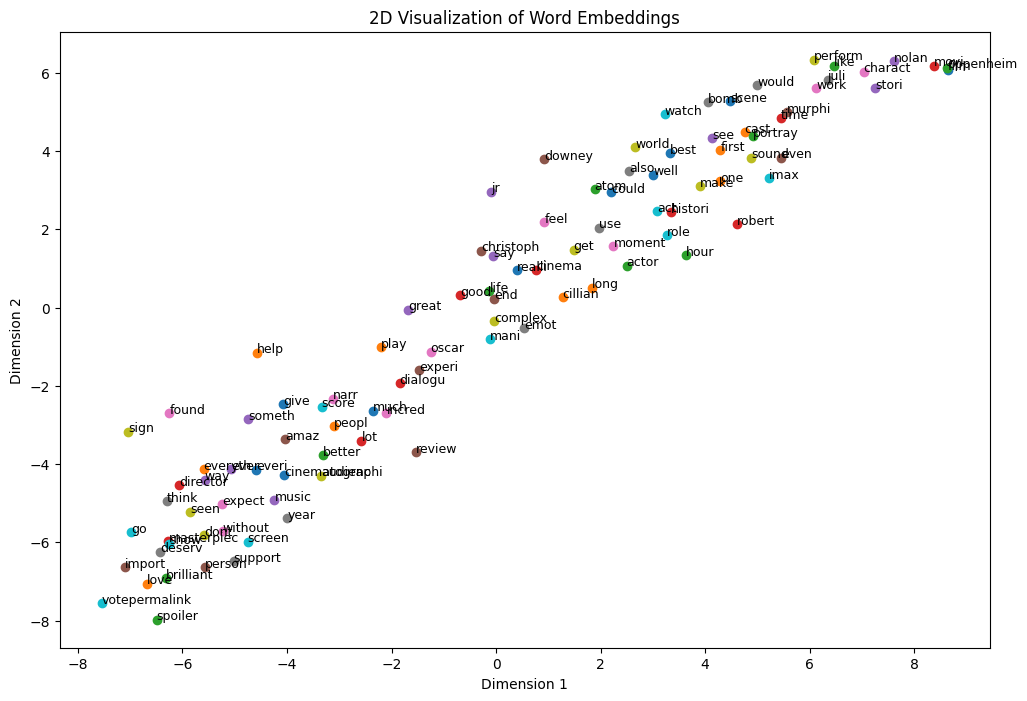

In [ ]:
# Write your code here
!pip install gensim matplotlib
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Train a Word2Vec model with 300 dimensions
model = Word2Vec(sentences=corpus_terms, vector_size=300, window=5, min_count=1, workers=4)

# Check if the model is trained
print("Vocabulary size:", len(model.wv))

# Dimensionality Reduction for Visualization (PCA or t-SNE)
def plot_embeddings(word_model, num_words=100):
    words = list(word_model.wv.index_to_key)[:num_words]  # Limit to top N words for clarity
    embeddings = [word_model.wv[word] for word in words]

    # Use PCA first to reduce dimensions for t-SNE
    pca = PCA(n_components=50)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Then use t-SNE for 2D projection
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
    tsne_embeddings = tsne.fit_transform(reduced_embeddings)

    # Plot the embeddings
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words):
        plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1])
        plt.annotate(word, (tsne_embeddings[i, 0], tsne_embeddings[i, 1]), fontsize=9)

    plt.title("2D Visualization of Word Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Visualize the top 100 words in the embedding space
plot_embeddings(model, num_words=100)



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [2]:
# The GitHub link of your final csv file


# Link: https://github.com/Kavyalikitha158/kattunga_kavyalikitha_5731/blob/main/imdb_movie_reviews_cleaned.csv
# https://github.com/Kavyalikitha158/kattunga_kavyalikitha_5731/blob/main/imdb_movie_reviews_labelled.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [1]:
# For me, the assignment has been an interesting and thought-provoking experience. Since sentiment analysis and text categorization are such important subjects in the field of natural language processing (NLP), I was thrilled about the chance to learn more about them when I first came across the task. But as I progressed through the many phases, I encountered several difficulties that complicated things while also enhancing my educational process.
# Preparing and preprocessing the data was one of the more difficult parts of this task. At first glance, this procedure appears simple—just collect some text data and clean it up—but it soon becomes apparent that it takes a great deal of attention to detail. For example, text preparation includes addressing several irregularities such as special characters, capitalization problems, and tokenization anomalies in addition to eliminating punctuation and stopwords. Additionally, it took some subjectivity and critical thought to determine how to accurately annotate the text with sentiment labels (positive, negative, and neutral). Some books, in my opinion, were difficult to categorize since they contained both positive and negative elements, or they had a neutral tone but powerful content.
# Training the machine learning models presented another difficulty. As I gained more knowledge about methods like Word2Vec and TF-IDF, I became more aware of how susceptible these models are to the caliber and volume of data they are fed. For example, in order to generate results that made sense for the data, I had to try a number of variables when constructing the word embeddings, including the window size and the embeddings' dimension size. Thorough testing and fine-tuning were also necessary to assess the model's accuracy and make sure the sentiment predictions were accurate.
# I did appreciate some parts of the task, though, in spite of the difficulties. Visualizing the word embeddings was one of these. It was exciting and satisfying to be able to visually see groups of related words by simplifying a 300-dimensional word vector to 2D. I now have an intuitive grasp of how context-based word interactions are captured by models such as Word2Vec. The graphic aid gave the abstract ideas a lot more substance and gave an idea of how words are categorized according to their meaning.
#My motivation was also maintained by sentiment analysis's usefulness. It felt relevant and interesting to work with real-world data, particularly movie or product reviews. I could see how this kind of analysis might be used in a lot of different fields, like social media monitoring, customer service, and marketing.
# Regarding the time allotted for the task, I think it was fair overall, but there were a few parts that seemed hurried, especially when it came to perfecting the models or comprehending the subtleties of the data. The training method involved a great deal of trial and error, and the preliminary steps—such as gathering and cleaning the dataset—took longer than anticipated. Given that the tuning phase can have a big impact on the outcomes, having extra time to experiment with various models or hyperparameters might have been beneficial. Nevertheless, the deadline was still doable, and I valued the sense of achievement I had from finishing the project and being able to construct and test a functional model.
# In conclusion, this task forced me to hone my technical abilities as well as my capacity to tackle challenging NLP issues. Although there were difficulties, there were also many chances for development and learning. I'm excited to expand upon this foundation in upcoming tasks and projects